# This notebook will take a qp,qc screen generated from StabilityScreen_CS3390.jl and generate corresponding heatmaps 

In [44]:
using SharedArrays
using Distributed
using Random
using JLD
using StatsBase
using Statistics

In [45]:
import PyPlot; const plt = PyPlot

PyPlot

### Change the line below to load in the correct jld save

In [4]:
d = load("nGen_200_nCellType_20_nMediator_15_ri0_0.2_posIntRatio_0.1_at_1_bt_0.1_CS3390_HEATMAP_seed_1586664016.jld")

Dict{String,Any} with 12 entries:
  "BT"     => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0650573 0.0650573 … …
  "CmpEDT" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.327463 0.142042 … 0.…
  "rintAT" => [-0.0 -0.0 … -0.0934389 -0.0934389; -0.0 -0.0 … -0.0934389 -0.093…
  "rintET" => [0.0 0.0 … 0.197437 0.197437; 0.0 0.0 … 0.197437 0.197437; … ; 0.…
  "V0DT"   => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0…
  "r0T"    => [0.0820562 0.0820562 … 0.0820562 0.0820562; 0.0820562 0.0820562 ……
  "NE0D"   => [1.0 1.0 … 2.0 1.0; 1.0 1.0 … 1.0 1.0; … ; 1.0 1.0 … 1.0 1.0; 1.0…
  "CmpBDT" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0…
  "SiT"    => [5022.99 5022.99 … 5022.99 5022.99; 5022.99 5022.99 … 5022.99 502…
  "AT"     => [0.0 0.0 … 0.969053 0.969053; 0.0 0.0 … 0.969053 0.969053; … ; 0.…
  "rintBT" => [-0.0 -0.0 … -0.197836 -0.197836; -0.0 -0.0 … -0.197836 -0.197836…
  "CmpADT" => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0;

In [7]:
NE0D = d["NE0D"];

In [8]:
size(NE0D)

(10, 10, 3, 2000)

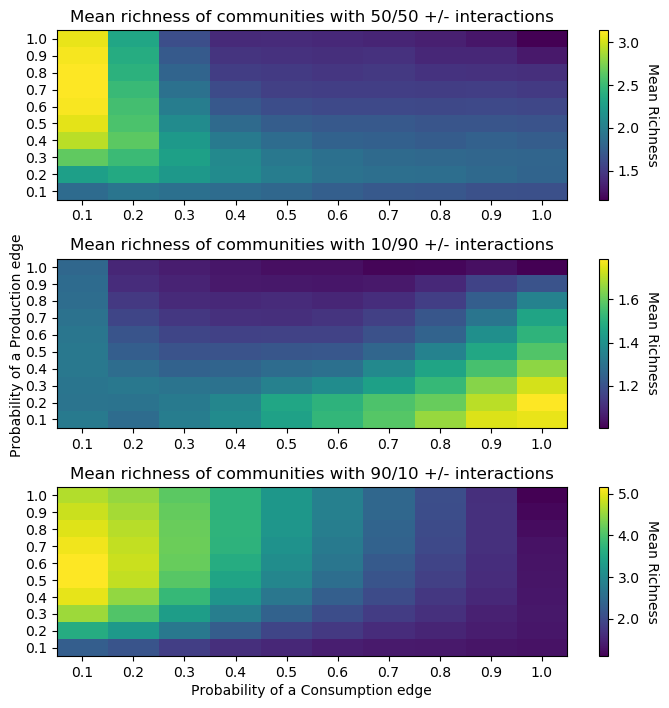

In [110]:
c = size(NE0D, 1)
Ameans = zeros(c,c)
Bmeans = zeros(c,c)
Emeans = zeros(c,c)

Amedians = zeros(c,c)
Bmedians = zeros(c,c)
Emedians = zeros(c,c)

Astd = zeros(c,c)
Bstd = zeros(c,c)
Estd = zeros(c,c)

axisvals = collect(1:c) ./ c
for qp = 1:c, qc = 1:c
    A = NE0D[qp, qc, 1, :]
    B = NE0D[qp, qc, 2, :]
    E = NE0D[qp, qc, 3, :]
    
    Ameans[qp, qc] = mean(A)
    Bmeans[qp, qc] = mean(B)
    Emeans[qp, qc] = mean(E)
    
    Amedians[qp, qc] = median(A)
    Bmedians[qp, qc] = median(B)
    Emedians[qp, qc] = median(E)
    
    Astd[qp, qc] = std(A)
    Bstd[qp, qc] = std(B)
    Estd[qp, qc] = std(E)
end

fig, (ax, ax2, ax3) = plt.subplots(3, 1)

im = ax.imshow(Ameans, origin="lower", aspect="auto")
cbar1 = ax.figure.colorbar(im, ax=ax, format="%0.1f")
cbar1.ax.set_ylabel("Mean Richness", rotation=-90, va="bottom")
ax.set_xticks(0:c-1)
ax.set_yticks(0:c-1)
ax.set_xticklabels(axisvals)
ax.set_yticklabels(axisvals)
ax.set_title("Mean richness of communities with 50/50 +/- interactions")

im2 = ax2.imshow(Bmeans, origin="lower", aspect="auto")
cbar2 = ax2.figure.colorbar(im2, ax=ax2, format="%0.1f")
cbar2.ax.set_ylabel("Mean Richness", rotation=-90, va="bottom")
ax2.set_xticks(0:c-1)
ax2.set_yticks(0:c-1)
ax2.set_xticklabels(axisvals)
ax2.set_yticklabels(axisvals)
ax2.set_title("Mean richness of communities with 10/90 +/- interactions")

im3 = ax3.imshow(Emeans, origin="lower", aspect="auto")
cbar3 = ax3.figure.colorbar(im3, ax=ax3, format="%0.1f")
cbar3.ax.set_ylabel("Mean Richness", rotation=-90, va="bottom")
ax3.set_xticks(0:c-1)
ax3.set_yticks(0:c-1)
ax3.set_xticklabels(axisvals)
ax3.set_yticklabels(axisvals)
ax3.set_title("Mean richness of communities with 90/10 +/- interactions")

fig.text(.43, 0, "Probability of a Consumption edge", ha="center")
fig.text(0, .5, "Probability of a Production edge", va="center", rotation="vertical")
fig.set_figheight(7)
fig.set_figwidth(7)
fig.tight_layout()
# p1 = heatmap(axisvals,
#         axisvals, Ameans,
#         xlabel="Probability of a Consumption edge", ylabel="Probability of a Production edge",
#         title="Mean richness of communities with 50/50 +/- interactions",
#         )
# p2 = heatmap(axisvals,
#         axisvals, Bmeans,
#         xlabel="Probability of a Consumption edge", ylabel="Probability of a Production edge",
#         title="Mean richness of communities with 10/90 +/- interactions",
#         )

# p3 = heatmap(axisvals,
#         axisvals, Emeans,
#         xlabel="Probability of a Consumption edge", ylabel="Probability of a Production edge",
#         title="Mean richness of communities with 90/10 +/- interactions",
#         )
# plot(p1, p2, p3, layout=l, dpi=100, size=(600,400))

In [112]:
fig.savefig("Coarse_Mean_Heatmap.png", dpi=300)

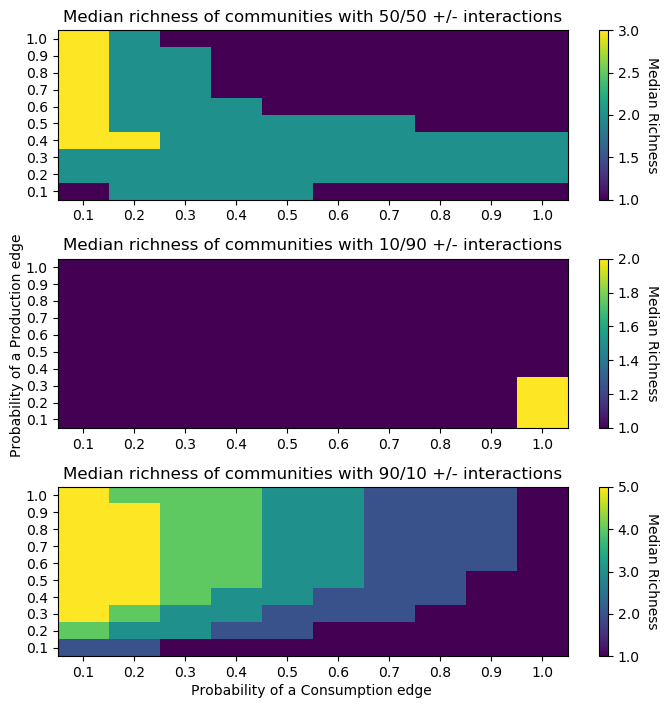

In [113]:
fig, (ax, ax2, ax3) = plt.subplots(3, 1)

im = ax.imshow(Amedians, origin="lower", aspect="auto")
cbar1 = ax.figure.colorbar(im, ax=ax, format="%0.1f")
cbar1.ax.set_ylabel("Median Richness", rotation=-90, va="bottom")
ax.set_xticks(0:c-1)
ax.set_yticks(0:c-1)
ax.set_xticklabels(axisvals)
ax.set_yticklabels(axisvals)
ax.set_title("Median richness of communities with 50/50 +/- interactions")

im2 = ax2.imshow(Bmedians, origin="lower", aspect="auto")
cbar2 = ax2.figure.colorbar(im2, ax=ax2, format="%0.1f")
cbar2.ax.set_ylabel("Median Richness", rotation=-90, va="bottom")
ax2.set_xticks(0:c-1)
ax2.set_yticks(0:c-1)
ax2.set_xticklabels(axisvals)
ax2.set_yticklabels(axisvals)
ax2.set_title("Median richness of communities with 10/90 +/- interactions")

im3 = ax3.imshow(Emedians, origin="lower", aspect="auto")
cbar3 = ax3.figure.colorbar(im3, ax=ax3, format="%0.1f")
cbar3.ax.set_ylabel("Median Richness", rotation=-90, va="bottom")
ax3.set_xticks(0:c-1)
ax3.set_yticks(0:c-1)
ax3.set_xticklabels(axisvals)
ax3.set_yticklabels(axisvals)
ax3.set_title("Median richness of communities with 90/10 +/- interactions")

fig.text(.43, 0, "Probability of a Consumption edge", ha="center")
fig.text(0, .5, "Probability of a Production edge", va="center", rotation="vertical")
fig.set_figheight(7)
fig.set_figwidth(7)
fig.tight_layout()


In [120]:
fig.savefig("Coarse_Median_Heatmap.png", dpi=300)

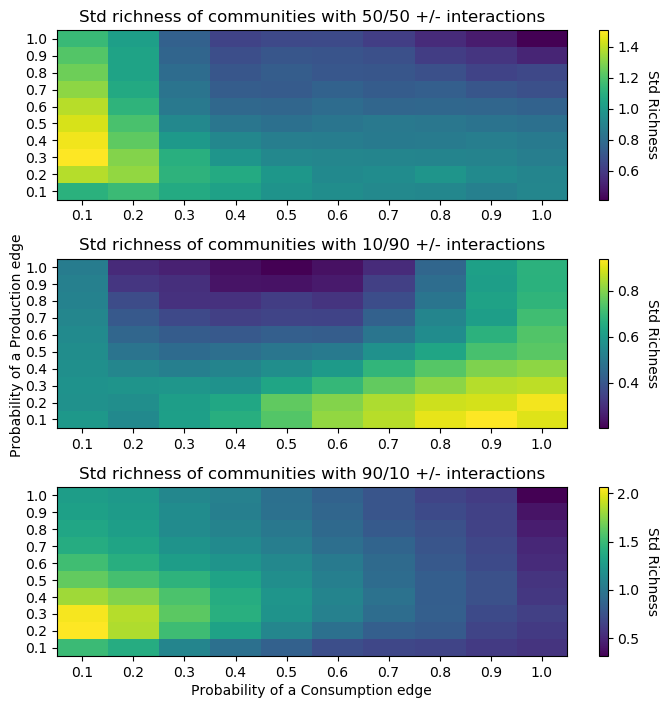

In [122]:
fig, (ax, ax2, ax3) = plt.subplots(3, 1)

im = ax.imshow(Astd, origin="lower", aspect="auto")
cbar1 = ax.figure.colorbar(im, ax=ax, format="%0.1f")
cbar1.ax.set_ylabel("Std Richness", rotation=-90, va="bottom")
ax.set_xticks(0:c-1)
ax.set_yticks(0:c-1)
ax.set_xticklabels(axisvals)
ax.set_yticklabels(axisvals)
ax.set_title("Std richness of communities with 50/50 +/- interactions")

im2 = ax2.imshow(Bstd, origin="lower", aspect="auto")
cbar2 = ax2.figure.colorbar(im2, ax=ax2, format="%0.1f")
cbar2.ax.set_ylabel("Std Richness", rotation=-90, va="bottom")
ax2.set_xticks(0:c-1)
ax2.set_yticks(0:c-1)
ax2.set_xticklabels(axisvals)
ax2.set_yticklabels(axisvals)
ax2.set_title("Std richness of communities with 10/90 +/- interactions")

im3 = ax3.imshow(Estd, origin="lower", aspect="auto")
cbar3 = ax3.figure.colorbar(im3, ax=ax3, format="%0.1f")
cbar3.ax.set_ylabel("Std Richness", rotation=-90, va="bottom")
ax3.set_xticks(0:c-1)
ax3.set_yticks(0:c-1)
ax3.set_xticklabels(axisvals)
ax3.set_yticklabels(axisvals)
ax3.set_title("Std richness of communities with 90/10 +/- interactions")

fig.text(.43, 0, "Probability of a Consumption edge", ha="center")
fig.text(0, .5, "Probability of a Production edge", va="center", rotation="vertical")
fig.set_figheight(7)
fig.set_figwidth(7)
fig.tight_layout()

In [123]:
fig.savefig("Coarse_Std_Heatmap.png", dpi=300)